<a href="https://colab.research.google.com/github/marknettle/covid/blob/master/Covid_rnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
devtools::install_github("RamiKrispin/coronavirus")

In [0]:
install.packages("zoo")
install.packages("RcppRoll")

In [0]:
library(coronavirus)
library(dplyr)
library(tidyr)
library(RcppRoll)
library(ggplot2)

In [0]:
update_dataset()

In [0]:
dim(coronavirus)

In [0]:
coronavirus %>% 
  group_by(type) %>%
  summarise(total_cases = sum(cases), latest = max(date))

In [0]:
window = 14
rates <- coronavirus %>%
  filter(type == "confirmed") %>%
  select(country,date,cases) %>%
  group_by(country) %>%
  mutate(mean = roll_mean(cases, n = window, fill = NA) ) %>%
  mutate(diff = roll_meanl(mean, n = window, fill = 0) - roll_meanr(mean, n = window, fill = 0) )

  

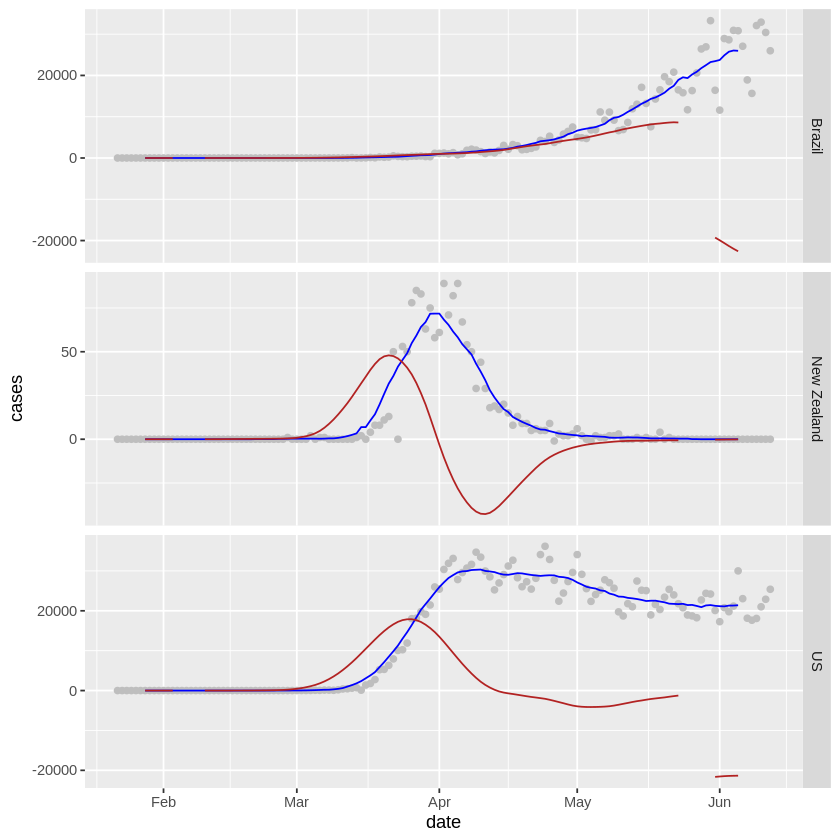

In [36]:
ggplot(data = rates %>%
  filter(country == "US" | country == "New Zealand" | country == "Brazil")
  , mapping = aes(x = date, y = cases)) +
  geom_point(colour="grey") +
  geom_line(mapping = aes(y = mean), colour = "blue", na.rm = TRUE) +
  geom_line(mapping = aes(y = diff), colour = "firebrick", na.rm = TRUE) +
  facet_grid(rows = vars(country), scales = "free_y")

In [0]:
?quartz

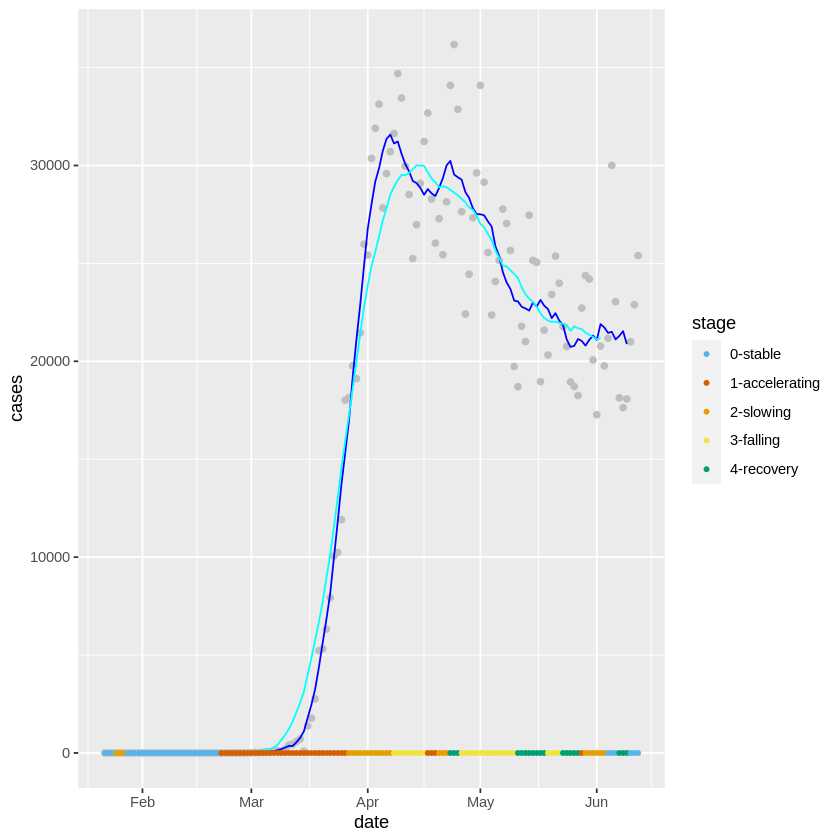

In [11]:
ggplot(data = us, mapping = aes(x = date, y = cases)) +
  geom_point(colour="grey") +
  geom_line(mapping = aes(y = m7), colour = "blue", na.rm = TRUE) +
  geom_line(mapping = aes(y = m21), colour = "cyan", na.rm = TRUE) +
  geom_point(mapping = aes(y = -2, colour = stage), size=1, na.rm = TRUE) +
  scale_color_manual(values =c("#56B4E9", "#D55E00", "#E69F00", "#F0E442", "#009E73"))

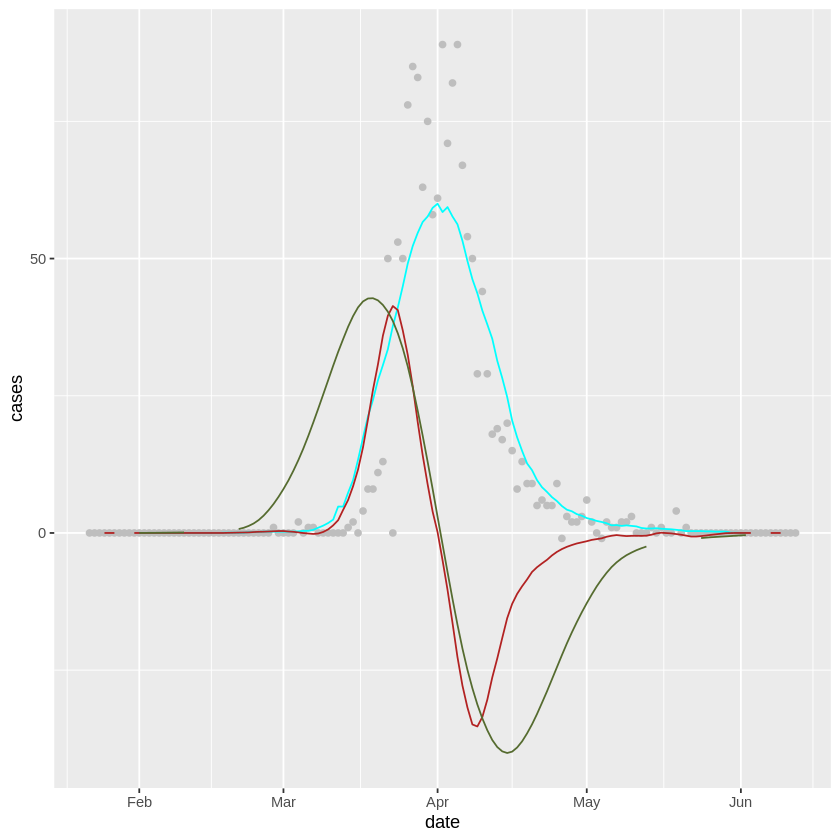

In [16]:
ggplot(data = nz, mapping = aes(x = date, y = cases)) +
  geom_point(colour="grey") +
  geom_line(mapping = aes(y = m21), colour = "cyan", na.rm = TRUE) +
  geom_line(mapping = aes(y = d1), color = "firebrick", na.rm = TRUE) +
  geom_line(mapping = aes(y = d1_21), color = "darkolivegreen", na.rm = TRUE) # +
#  geom_line(mapping = aes(y = d2), color = "darkolivegreen", na.rm = TRUE) +
#  geom_line(mapping = aes(y = d3), color = "deepskyblue4", na.rm = TRUE) +
#  geom_point(mapping = aes(y = -10, colour = stage), na.rm = TRUE) +
#  scale_color_manual(values =c("#56B4E9", "#D55E00", "#E69F00", "#F0E442", "#009E73"))

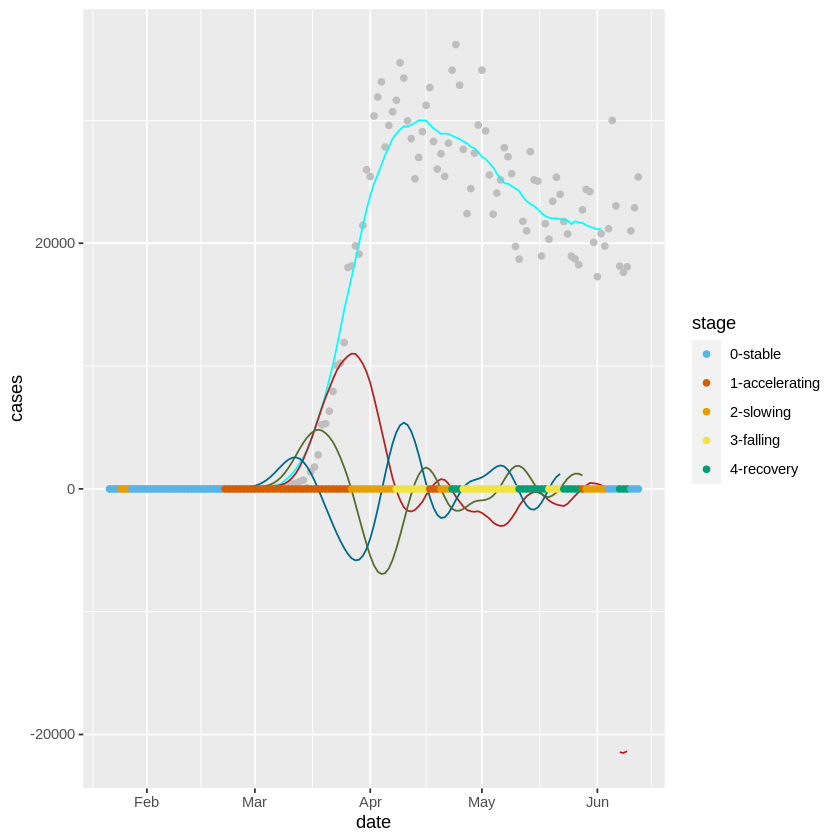

In [12]:
ggplot(data = us, mapping = aes(x = date, y = cases)) +
  geom_point(colour="grey") +
  geom_line(mapping = aes(y = m21), colour = "cyan", na.rm = TRUE) +
  geom_line(mapping = aes(y = d1), color = "firebrick", na.rm = TRUE) +
  geom_line(mapping = aes(y = d2), color = "darkolivegreen", na.rm = TRUE) +
  geom_line(mapping = aes(y = d3), color = "deepskyblue4", na.rm = TRUE) +
  geom_point(mapping = aes(y = -10, colour = stage), na.rm = TRUE) +
  scale_color_manual(values =c("#56B4E9", "#D55E00", "#E69F00", "#F0E442", "#009E73"))

In [0]:
installed.packages()[,c(3:5)]

In [0]:
sessionInfo()